In [2]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

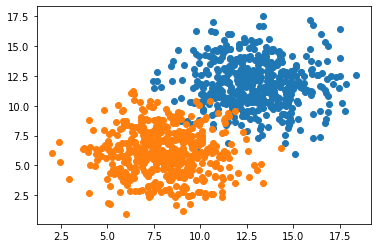

In [4]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [7]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss = 'binary_crossentropy', metrics = 'accuracy')
model_history = model.fit(x=X, y=y, verbose = 0, batch_size = 50, epochs = 500, shuffle = 'true')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


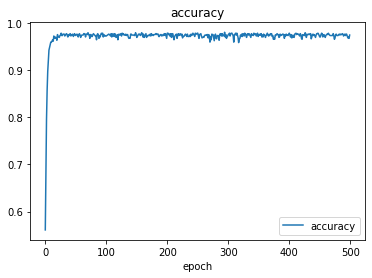

In [8]:
plt.plot(model_history.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

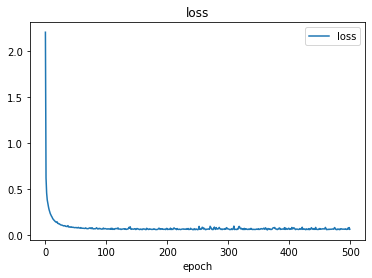

In [9]:
plt.plot(model_history.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [21]:
def plot_decision_boundary(array_of_data, labels, model):
  x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
  y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

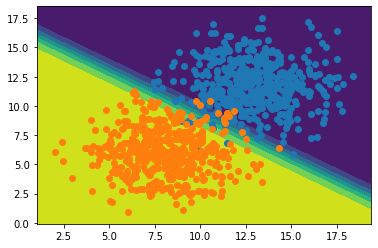

In [23]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

Prediction is :  [[0.9999914]]


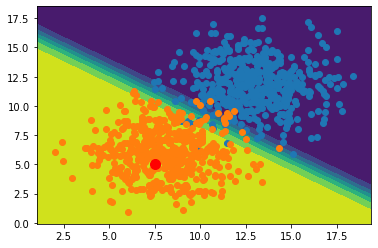

In [25]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

x = 7.5
y = 5
point_predict = np.array([[x,y]])

prediction = model.predict(point_predict)
plt.plot([x], [y], marker="o", markersize = 10, color = "red")
print("Prediction is : ", prediction)